# Roadmap

$$ \text{timing info}\xleftarrow{\text{any bin}} \text{RR: } T \times (N * B)\xrightarrow{\text{tot bin = window}}\text{count info}$$
<br>
$$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\downarrow{\frac{\Sigma{\text{ (columns: T)}}} {\text{T in E}}} $$
<br>
$$ PSTH $$
<br>
$$\text{RR = relative response | T = trials | N = neurons | B = bins | E = events}$$

# Goal
* Find probabilities of response given events
  * Use probabilities to find entropy
    * Use entropy to find information
  * Understand similiarties and differences between timing and count
* Extra credit: Learn how bin sizes influence information

# Spike Count for Neuron 1
1. Make your relative response matrix for given event
$$
\begin{bmatrix}\text{trial 1}\\\text{trial 2}\\\text{trial 3}\end{bmatrix}
\begin{bmatrix}0&0&1&0&1\\1&0&0&1&1\\0&0&1&0&1\end{bmatrix}
$$

2. Sum all of the spikes in your window  
* Note that spike count is the special case when bin size = window length
$$
\begin{bmatrix}\text{trial 1}\\\text{trial 2}\\\text{trial 3}\end{bmatrix}
\begin{bmatrix}0&0&1&0&1\\1&0&0&1&1\\0&0&1&0&1\end{bmatrix}
\xrightarrow{\text{sum}}
\begin{bmatrix}\text{trial 1}\\\text{trial 2}\\\text{trial 3}\end{bmatrix}
\begin{bmatrix}2\\3\\2\end{bmatrix}$$

# Calculating Spike Count Probability
More on this later
$$\begin{bmatrix}\text{trial 1}\\\text{trial 2}\\\text{trial 3}\end{bmatrix}\begin{bmatrix}2\\3\\2\end{bmatrix}$$

3. Find the unique spike counts across trials
<br>
$$\begin{bmatrix}0&0&1&0&1\\1&0&0&1&1\\0&0&1&0&1\end{bmatrix}\xrightarrow{\text{sum}}\begin{bmatrix}2\\3\\2\end{bmatrix}\xrightarrow{\text{unique}}\begin{bmatrix}2\\3\end{bmatrix}$$

4. Calculate propability of a given spike count occuring across trials
<br>
$$\begin{bmatrix}0&0&1&0&1\\1&0&0&1&1\\0&0&1&0&1\end{bmatrix}\xrightarrow{\text{sum}}\begin{bmatrix}2\\3\\2\end{bmatrix}\xrightarrow{\text{unique}}\begin{bmatrix}2\\3\end{bmatrix}\xrightarrow{\text{prob}}\begin{bmatrix}0.666666667\\0.333333333\end{bmatrix}$$

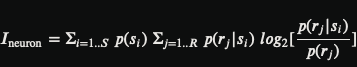# Entropy
5. Calculate entropy of bin count for event
$$H = -\Sigma{p(r_i)log_2(p(r_i))}$$
* r = response (spike count, spike timing, etc.)
* $p(r_i)$ = probability of response occuring for given event
$$H = -[(0.66667 * log_2(0.66667)) + (0.33333 * log_2(0.33333))] = 0.9183$$

# Spike Timing Probability
1. Calculate relative response matrix for given event
$$
\begin{bmatrix}\text{trial 1}\\\text{trial 2}\\\text{trial 3}\end{bmatrix}
\begin{bmatrix}0&0&1&0&1\\1&0&0&1&1\\0&0&1&0&1\end{bmatrix}
$$

2. Find unique spike timing patterns
<br>
$$
\begin{bmatrix}\text{trial 1}\\\text{trial 2}\\\text{trial 3}\end{bmatrix}
\begin{bmatrix}0&0&1&0&1\\1&0&0&1&1\\0&0&1&0&1\end{bmatrix}
\xrightarrow{\text{unique}}
\begin{bmatrix}0&0&1&0&1\\1&0&0&1&1\end{bmatrix}$$

3. Calculate propability of a given spike pattern occuring
<br>
$$\begin{bmatrix}0&0&1&0&1\\1&0&0&1&1\\0&0&1&0&1\end{bmatrix}\xrightarrow{\text{unique}}\begin{bmatrix}0&0&1&0&1\\1&0&0&1&1\end{bmatrix}\xrightarrow{\text{probability}}\begin{bmatrix}0.666666667\\0.333333333\end{bmatrix}$$

5. Calculate entropy for timing for event
$$H = -\Sigma{p(r_i)log_2(p(r_i))}$$
$$\text{H = entropy | r = response}$$
$$H = -[(0.66667 * log_2(0.66667)) + (0.33333 * log_2(0.33333))] = 0.9183$$

# Mutual Info for Spike Count
* Finds the information for a neuron spike counts across stimulus
  * Note that the process is exactly the same for spike timing
$$I_\text{neuron} = \Sigma_{i = 1..S}\;{p(s_i)\;\Sigma_{j = 1..R}\;{p(r_j|s_i)\;log_2[ \frac {p(r_j|s_i)} {p(r_j)} ]}}$$
* r = response 
  * ex: spike count
  * ex: spike timing
* s = stimulus (ie: event)
* $p(s_i)$ = probability of event
* $p(r_j|s_i)$ = probality of response given an event
  * $p(r_\mathrm{spike counts:neuron\_1= 0} | s_\mathrm{event\_1})$
* $p(r_j)$ = probability of response across all events
  * $p(r_\mathrm{spike counts:neuron\_1= 0})$

# Calculating p(rj|si) for Spike Counts
$p(r_j|s_i)$ = probability of response across neurons given specific stimulus  
$$\text{event 1 spike counts per trial}$$
$$
\begin{bmatrix}\text{neuron}\\\text{trial 1}\\\text{trial 2}\\\text{trial 3}\\\text{trial 4}\end{bmatrix}
\begin{bmatrix}\text{sig001a}\\0\\1\\1\\0\end{bmatrix}
$$

$$p(r_\text{spike count = 0} | s_\mathrm{event\_1}) = 0.5$$
$$p(r_\text{spike count = 1} | s_\mathrm{event\_1}) = 0.5$$

$$\text{event 2 spike counts per trial}$$
$$
\begin{bmatrix}\text{neuron}\\\text{trial 1}\\\text{trial 2}\\\text{trial 3}\end{bmatrix}
\begin{bmatrix}\text{sig001a}\\0\\1\\1\end{bmatrix}
$$

$$p(r_\text{spike count = 0} | s_\mathrm{event\_2}) = 0.33$$
$$p(r_\text{spike count = 1} | s_\mathrm{event\_2}) = 0.67$$

# Calculating p(rj)
$$p(r_j) = \Sigma_{i = 1..S}\;p(s_i) * p(r_j|s_i)$$

1. define rj
$$r_j = 0$$
2. Calculate probability of events occuring
$$ p(s_\mathrm{event\_1}) = \frac{\text{event 1 trials}} {\text{total trials}} = \frac{4} {7}$$
<br>
$$ p(s_\mathrm{event\_2}) = \frac{\text{event 2 trials}} {\text{total trials}} = \frac{3} {7}$$
3. Compute sum
$$p(r_\text{0}) = (\frac{4} {7} * 0.5) + (\frac{3} {7} * \frac{1} {3}) = \frac{3} {7}$$
$$p(r_\text{1}) = (\frac{4} {7} * 0.5) + (\frac{3} {7} * \frac{2} {3}) = \frac{4} {7}$$

# Calculating Mutual Info
For the first event:
$$p(s_i) * \Sigma_{j = 1..R}\;{p(r_j|s_i)\;log_2[\frac {p(r_j|s_i)} {p(r_j)}]}$$
<br>
$$
p(r_{0}|s_\mathrm{event\_1}) * log_2[\frac {p(r_{0}|s_\mathrm{event\_1})} {p(r_{0})}]
= 0.5 * log_2[\frac{0.5} {\frac{3} {7}}]
= 0.11120
$$
<br>
$$
p(r_{1}|s_\mathrm{event\_1}) * log_2[\frac {p(r_{1}|s_\mathrm{event\_1})} {p(r_{1})}]
= 0.5 * log_2[\frac {0.5} {\frac {4} {7}}]
= -0.09632
$$
<br>
$$p(s_\mathrm{event\_1}) * \Sigma_{j = 1..R}\; = \frac {4} {7} * (0.11120 + -0.09632) = 0.00850$$

For the second event:
$$p(s_i) * \Sigma_{j = 1..R}\;{p(r_j|s_i)\;log_2[\frac {p(r_j|s_i)} {p(r_j)}]}$$
<br>
$$
p(r_{0}|s_\mathrm{event\_2}) * log_2[\frac {p(r_{0}|s_\mathrm{event\_2})} {p(r_{0})}]
= \frac {1} {3} * log_2[\frac{\frac {1} {3}} {\frac{3} {7}}]
= -0.12086
$$
<br>
$$
p(r_{1}|s_\mathrm{event\_2}) * log_2[\frac {p(r_{1}|s_\mathrm{event\_2})} {p(r_{1})}]
= \frac {2} {3} * log_2[\frac {\frac {2} {3}} {\frac {4} {7}}]
= 0.14826
$$
<br>
$$
p(s_\mathrm{event\_2}) * \Sigma_{j = 1..R}\; = \frac {3} {7} * (-0.12086 + 0.14826) = 0.01174
$$

Sum the events:
$$I_\text{sig001a} = \Sigma_{i = 1..S}\; = 0.00850 + 0.01174 = 0.0202$$

# Joint Mutual Info
* Finds the information between neurons across stimulus
  * Note that the process is exactly the same for spike timing
$$I_\text{joint} = \Sigma_{i = 1..S}\;{p(s_i)\;\Sigma_{j = 1..R}\;{p(r_j|s_i)\;log_2[ \frac {p(r_j|s_i)} {p(r_j)} ]}}$$
* r = response 
  * ex: spike count: total number of spikes for each trial across neuron population
  * ex: timing count: spike pattern for each trial across neuron population
* s = stimulus (ie: event)
* $p(s_i)$ = probability of event
* $p(r_j|s_i)$ = probality of response across neurons given an event
  * $p(r_\mathrm{spike counts:neuron\_1= 0,neuron\_2=2} | s_\mathrm{event\_1})$
* $p(r_j)$ = probability of response across all events
  * $p(r_\mathrm{spike counts:neuron\_1= 0,neuron\_2=2})$

# Calculating p(rj|si) for Spike Counts
$p(r_j|s_i)$ = probability of response across neurons given specific stimulus  
$$\text{event 1 spike counts per trial}$$
$$
\begin{bmatrix}\text{neuron}\\\text{trial 1}\\\text{trial 2}\\\text{trial 3}\\\text{trial 4}\end{bmatrix}
\begin{bmatrix}\text{sig001a}\\0\\1\\1\\0\end{bmatrix}
\begin{bmatrix}\text{sig007a}\\2\\0\\0\\1\end{bmatrix}
$$

$$p(r_\text{spike count = 0,2} | s_\mathrm{event\_1}) = 0.25$$
$$p(r_\text{spike count = 1,0} | s_\mathrm{event\_1}) = 0.5$$
$$p(r_\text{spike count = 0,1} | s_\mathrm{event\_1}) = 0.25$$

$$\text{event 2 spike counts per trial}$$
$$
\begin{bmatrix}\text{neuron}\\\text{trial 1}\\\text{trial 2}\\\text{trial 3}\end{bmatrix}
\begin{bmatrix}\text{sig001a}\\0\\1\\1\end{bmatrix}
\begin{bmatrix}\text{sig007a}\\2\\0\\0\end{bmatrix}
$$

$$p(r_\text{spike count = 0,2} | s_\mathrm{event\_2}) = 0.33$$
$$p(r_\text{spike count = 1,0} | s_\mathrm{event\_2}) = 0.67$$

# Calculating p(rj)
$$p(r_j) = \Sigma_{i = 1..S}\;p(s_i) * p(r_j|s_i)$$

1. define rj
$$r_j = 0,2$$
2. Calculate probability of events occuring
$$ p(s_\mathrm{event\_1}) = \frac{\text{event 1 trials}} {\text{total trials}} = \frac{4} {7}$$
<br>
$$ p(s_\mathrm{event\_2}) = \frac{\text{event 2 trials}} {\text{total trials}} = \frac{3} {7}$$
3. Compute sum
$$p(r_\text{0,2}) = (\frac{4} {7} * 0.25) + (\frac{3} {7} * \frac{1} {3}) = \frac{2} {7}$$
$$p(r_\text{1,0}) = (\frac{4} {7} * 0.5) + (\frac{3} {7} * \frac{2} {3}) = \frac{4} {7}$$
$$p(r_\text{0,1}) = (\frac{4} {7} * 0.25) = \frac{1} {7}$$

# Joint Mutual Info
* Finds the information between neurons across stimulus
$$\Sigma_{i = 1..S}\;{p(s_i)\;\Sigma_{j = 1..R}\;{p(r_j|s_i)\;log_2[ \frac {p(r_j|s_i)} {p(r_j)} ]}}$$
* r = response (ie: bin count)  
* s = stimulus (ie: event)
* $p(s_i)$ = probability of event
* $p(r_j|s_i)$ = probality of response across neurons given an event
  * $p(r_\text{spike count = 0,2} | s_\mathrm{event\_1})$
* $p(r_j)$ = probability of response across all events
  * $p(r_\text{spike count = 0,2})$

# Calculating Joint Mutual Info
For the first event:
$$p(s_i) * \Sigma_{j = 1..R}\;{p(r_j|s_i)\;log_2[\frac {p(r_j|s_i)} {p(r_j)}]}$$
<br>
$$
p(r_{0,2}|s_\mathrm{event\_1}) * log_2[\frac {p(r_{0,2}|s_\mathrm{event\_1})} {p(r_{0,2})}]
= 0.25 * log_2[\frac{0.25} {\frac{2} {7}}]
= -0.04816
$$
<br>
$$
p(r_{1,0}|s_\mathrm{event\_1}) * log_2[\frac {p(r_{1,0}|s_\mathrm{event\_1})} {p(r_{1,0})}]
= 0.5 * log_2[\frac {0.5} {\frac {4} {7}}]
= -0.09632
$$
<br>
$$
p(r_{0,1}|s_\mathrm{event\_1}) * log_2[\frac {p(r_{0,1}|s_\mathrm{event\_1})} {p(r_{0,1})}]
= 0.25 * log_2[\frac{0.25} {\frac{1} {7}}]
= 0.20184
$$
<br>
$$p(s_\mathrm{event\_1}) * \Sigma_{j = 1..R}\; = \frac {4} {7} * (-0.04816 + -0.09632 + 0.20184) = 0.0328$$

For the second event:
$$p(s_i) * \Sigma_{j = 1..R}\;{p(r_j|s_i)\;log_2[\frac {p(r_j|s_i)} {p(r_j)}]}$$
<br>
$$
p(r_{0,2}|s_\mathrm{event\_2}) * log_2[\frac {p(r_{0,2}|s_\mathrm{event\_2})} {p(r_{0,2})}]
= \frac {1} {3} * log_2[\frac{\frac {1} {3}} {\frac{2} {7}}]
= -0.25920
$$
<br>
$$
p(r_{1,0}|s_\mathrm{event\_2}) * log_2[\frac {p(r_{1,0}|s_\mathrm{event\_2})} {p(r_{1,0})}]
= \frac {2} {3} * log_2[\frac {\frac {2} {3}} {\frac {4} {7}}]
= 0.14826
$$
<br>
$$
p(s_\mathrm{event\_2}) * \Sigma_{j = 1..R}\; = \frac {3} {7} * (-0.25920 + 0.14826) = -0.04755
$$

Sum the events:
$$\Sigma_{i = 1..S}\; = 0.0328 + -0.04755 = -0.01477$$

# Synergy Redundancy
Since you only calculate the spike count joint mutual information, the formuala beaks down to:
$$\text{synergy redundancy} =  I_\text{joint} - (\Sigma_{n = 1..neuron}\;I_n)$$
So for our example it would be:
$$\text{synergy redundancy} =  I_\text{joint} - (I_\text{sig001a} + I_\text{sig007a})$$

# What to turn in
## Conceptual Questions (10pts)
* pdf with answers to conceptual questions
  * Extra credit: Include summary and graphs in this pdf as well
* Code files you wrote to create JSON output file
* Code files should be plain text with proper file extension
  * ex: last_first_hw1.m, last_first_hw1.py, etc.

# Json Output File (10pts)
* This file will be input into automatic grader
* This was taken from the example solution json and is a small snippet
* You are not required to turn in a pretty formatted json file
```json
{
    "joint_mutual_info": 0.33344173107597835,
    "sig001a": {
        "count_mutual_info": 0.05641115694179237,
        "event_1": {
            "count_entropy": 2.256315725743558
        }
    }
}
```